In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
def LogisticMapping(x, mu):
    return 4*mu * x * (1-x)

In [3]:
def select_reg(xmin, xmax, x_data, y_data):
    # Get the indices of the x values within the range we want to fit
    x_data = x_data[xmin:xmax]
    y_data = y_data[xmin:xmax]
    return x_data,y_data


def exponential(x, lam):
    return 10**(-16)*np.exp(lam*x)


def exponential_fit(xmin, xmax, x_data, y_data): # Define the range of x values to fit the Gaussian to
    # Plot the data
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(x_data, y_data, label="Data",color='red',s=20)
    x_data,y_data = select_reg(xmin, xmax, x_data, y_data)
    # Use the curve_fit function to fit the Gaussian to the selected data
    y_max = max(y_data)
    popt, pcov = curve_fit(exponential, x_data, y_data)
    # c, N, center, stddev
    ## Print the results
    print('lambda:' ,popt[0],'with uncertainty =',(pcov[0][0])**(1/2))




In [4]:
mu = 0.9

x = 0.99
y = abs(x - 10**(-16)) 

print(x, y)
sep = []

for i in range(200):
    sep.append(abs(y - x))
    x = LogisticMapping(x, mu)
    y = LogisticMapping(y, mu)





0.99 0.9899999999999999


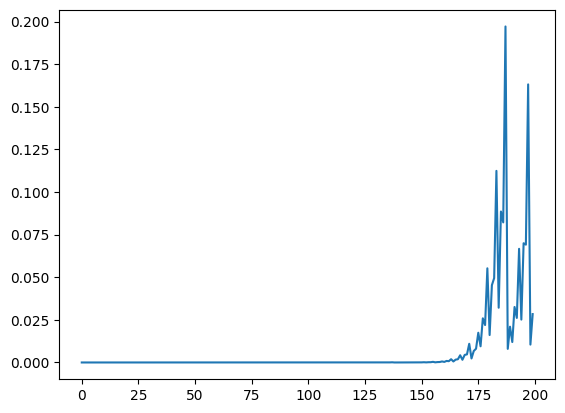

In [5]:
plt.plot(sep)

lambda: 0.18565895737774757 with uncertainty = 0.000173535665520843


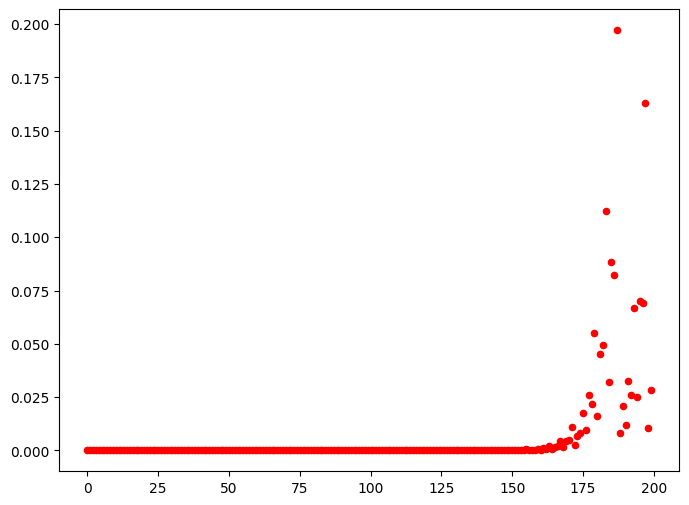

In [6]:
stop_index = sep.index(max(sep))
exponential_fit(0, stop_index, np.arange(0, len(sep)), sep)